# TEAM PROJECT 

### CPSC-4810-001

Team members:

- Anna Dorosheva

- Andres Obregon

- Javier Medina

- Karina Bautista

# Data: Fire Dataset

### Description:

This project is based on the Fire dataset from the years 2013 to 2023 of British Columbia. Fire dataset has in total 11,073,907 obs. of 40 variables. 

- lat: Latitude (Categorical, Ordinal)
- lon: Longitude (Categorical, Ordinal)
- rep_date: Date and time (-, -)
- uid: Unique ID (Categorical, Ordinal)
- source: The government agency provides the information (Categorical, Nominal)
- sensor: Type of equipment (Categorical, Nominal)
- satellite: Satellite used by the agencies (Categorical, Nominal)
- agency: Province and territory of Canada (Categorical, Nominal)
- temp: Temperature (Numerical, Continuous)
- rh: Relative Humidity (Numerical, Discrete)
- ws: Wind speed (Numerical, Continuous)
- wd: Wind direction (Numerical, Discrete)
- pcp: Precipitation (Numerical, Continuous)
- ffmc: The Fine Fuel Moisture Code (Numerical, Continuous)
- dmc: Duff Moisture Code (Numerical, Continuous)
- dc: Drought Code (Numerical, Continuous)
- isi: Initial Spread Index (Numerical, Continuous)
- bui: Buildup Index (Numerical, Continuous)
- fwi: Fire Weather Index (Numerical, Continuous)
- fuel: Combustible to maintain the fire (Categorical, Nominal)
- ros: Rate of spread (Numerical, Continuous)
- sfc: Surface Fuel Consumption (Numerical, Continuous)
- tfc: Total fuel consumption (Numerical, Continuous)
- bfc: Bonfire fuel consumption (Numerical, Continuous)
- hfi: Head Fire Intensity (Numerical, Discrete)
- cfb: Crown Fraction Burned (Numerical, Discrete)
- age: Forest Age (Categorical, Discrete)
- estarea: Estimated area (Numerical, Continuous)
- polyid: Fire point identified by satellites (Categorical, Discrete)
- pcuring: Percent curing (Numerical, Discrete)
- cfactor: Curing factor (Numerical, Continuous)
- greenup: Phenological state of deciduous trees (Categorical, Discrete)
- elev: Elevation above sea level (Numerical, Discrete)
- cfl: Crown fuel load (Numerical, Continuous)
- tfc0: Total fuel consumption (Numerical, Continuous)
- sfl: Surface fuel load (Numerical, Continuous)
- ecozone: Ecozone in which hotspot is located (Numerical, Discrete)
- sfc0: Surface Fuel Consumption (Numerical, Continuous)
- cbh: Crown base height (Numerical, Continuous)
- geometry: Geometry points (Multipoint, Multipoint)

# Import necesary libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path = './data/CSV Files'  # Adjust this path to your folder with CSV files
data_path

'./data/CSV Files'

# List and Filter "Hotspots" Files

For this part we list and filter the files we want to analyze 'Hotspots'. In addition, we check that all of the columns are in lower case because some files have lower column names and others haver upper column names.

In [3]:
# Assuming the directory containing the files is in 'data_path'
# List all files in the data directory
all_files = os.listdir(data_path)

# Filter for files with "Hotspots" in their names
hotspots_files = [f for f in all_files if "Hotspots" in f]

# Iterate over each file and ensure column names are lowercase
for file in hotspots_files:
    # Construct the full path to the file
    file_path = os.path.join(data_path, file)
    
    # Load the file (assuming CSV format, adjust if necessary)
    df = pd.read_csv(file_path)
    
    # Ensure column names are lowercase
    df.columns = [col.lower() for col in df.columns]
    
    # Save the modified dataframe back to the same file (or a new file)
    df.to_csv(file_path, index=False)  # Overwrite the original file
    # Alternatively, save with a different name if you want to keep the original intact
    # df.to_csv(os.path.join(data_path, f"lowercase_{file}"), index=False)

    print(f"Columns in {file} have been converted to lowercase.")

print("All hotspot files have been processed.")


Columns in 2013_Hotspots.csv have been converted to lowercase.
Columns in 2014_Hotspots.csv have been converted to lowercase.
Columns in 2015_Hotspots.csv have been converted to lowercase.
Columns in 2016_Hotspots.csv have been converted to lowercase.
Columns in 2017_Hotspots.csv have been converted to lowercase.
Columns in 2018_Hotspots.csv have been converted to lowercase.
Columns in 2019_Hotspots.csv have been converted to lowercase.
Columns in 2020_Hotspots.csv have been converted to lowercase.
Columns in 2021_Hotspots.csv have been converted to lowercase.
Columns in 2022_Hotspots.csv have been converted to lowercase.
Columns in 2023_Hotspots.csv have been converted to lowercase.
All hotspot files have been processed.


# Compare if the datasets have the same columns

The datasets do not have the same columns. We want all the data to have the same columns and number of columns, so we will have the 33 first columns since all data have it.

In [4]:
# List to hold the set of columns for each file
columns_sets = []

# Iterate over each file to collect columns
for file in hotspots_files:
    # Construct the full path to the file
    file_path = os.path.join(data_path, file)
    
    # Load the file (assuming CSV format)
    df = pd.read_csv(file_path)
    
    # Get the set of columns (unique column names) for this file
    columns_sets.append(set(df.columns))
    
    # Print the number of columns for each file (optional)
    print(f"{file} has {len(df.columns)} columns.")

# Find the intersection of all column sets (common columns across all files)
common_columns = set.intersection(*columns_sets)

# Print the common columns
if common_columns:
    print("\nCommon columns across all files:")
    for col in common_columns:
        print(col)
else:
    print("\nNo common columns across all files.")

# Convert the set of common columns to a list (required for DataFrame indexing)
common_columns = list(common_columns)

# Now update each file to keep only the common columns
for file in hotspots_files:
    # Construct the full path to the file
    file_path = os.path.join(data_path, file)
    
    # Load the file (assuming CSV format)
    df = pd.read_csv(file_path)
    
    # Retain only the common columns
    df_filtered = df[common_columns]
    
    # Save the modified dataframe back to the same file (overwrite the original file)
    df_filtered.to_csv(file_path, index=False)
    print(f"Updated {file} to retain only the common columns.")

print("All files have been updated to retain only the common columns.")

2013_Hotspots.csv has 27 columns.
2014_Hotspots.csv has 27 columns.
2015_Hotspots.csv has 27 columns.
2016_Hotspots.csv has 27 columns.
2017_Hotspots.csv has 27 columns.
2018_Hotspots.csv has 27 columns.
2019_Hotspots.csv has 27 columns.
2020_Hotspots.csv has 27 columns.
2021_Hotspots.csv has 27 columns.
2022_Hotspots.csv has 27 columns.
2023_Hotspots.csv has 27 columns.

Common columns across all files:
dc
satellite
ws
sfc
tfc
dmc
greenup
fuel
cfb
isi
rep_date
fwi
temp
pcuring
rh
lat
ffmc
hfi
ros
sensor
elev
bui
agency
lon
source
pcp
wd
Updated 2013_Hotspots.csv to retain only the common columns.
Updated 2014_Hotspots.csv to retain only the common columns.
Updated 2015_Hotspots.csv to retain only the common columns.
Updated 2016_Hotspots.csv to retain only the common columns.
Updated 2017_Hotspots.csv to retain only the common columns.
Updated 2018_Hotspots.csv to retain only the common columns.
Updated 2019_Hotspots.csv to retain only the common columns.
Updated 2020_Hotspots.csv to 

In [5]:
for file in hotspots_files:
    # Construct the full path to the file
    file_path = os.path.join(data_path, file)
    
    # Load the file (assuming CSV format)
    df = pd.read_csv(file_path)
    
    # Get the set of columns (unique column names) for this file
    columns_sets.append(set(df.columns))
    
    # Print the number of columns for each file (optional)
    print(f"{file} has {len(df.columns)} columns.")

2013_Hotspots.csv has 27 columns.
2014_Hotspots.csv has 27 columns.
2015_Hotspots.csv has 27 columns.
2016_Hotspots.csv has 27 columns.
2017_Hotspots.csv has 27 columns.
2018_Hotspots.csv has 27 columns.
2019_Hotspots.csv has 27 columns.
2020_Hotspots.csv has 27 columns.
2021_Hotspots.csv has 27 columns.
2022_Hotspots.csv has 27 columns.
2023_Hotspots.csv has 27 columns.


# Merge the dataframes

Load files into a single DataFrame

In [6]:
# empty list to store DataFrames
data_frames = []

# Load each file into a DataFrame
for file in hotspots_files:
    file_path = os.path.join(data_path, file)
    df = pd.read_csv(file_path)
    
    # Add a column to id the year (from the file name)
    df["Year"] = file.split("_")[0]
    data_frames.append(df)

# Combine all DataFrames into a single DataFrame
combined_data = pd.concat(data_frames, ignore_index=True)

# Check the structure of the df
print(combined_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11073907 entries, 0 to 11073906
Data columns (total 28 columns):
 #   Column     Dtype  
---  ------     -----  
 0   dc         float64
 1   satellite  object 
 2   ws         float64
 3   sfc        float64
 4   tfc        float64
 5   dmc        float64
 6   greenup    float64
 7   fuel       object 
 8   cfb        float64
 9   isi        float64
 10  rep_date   object 
 11  fwi        float64
 12  temp       float64
 13  pcuring    float64
 14  rh         int64  
 15  lat        float64
 16  ffmc       float64
 17  hfi        float64
 18  ros        float64
 19  sensor     object 
 20  elev       float64
 21  bui        float64
 22  agency     object 
 23  lon        float64
 24  source     object 
 25  pcp        float64
 26  wd         int64  
 27  Year       object 
dtypes: float64(19), int64(2), object(7)
memory usage: 2.3+ GB
None


In [7]:
print(combined_data.columns)

Index(['dc', 'satellite', 'ws', 'sfc', 'tfc', 'dmc', 'greenup', 'fuel', 'cfb',
       'isi', 'rep_date', 'fwi', 'temp', 'pcuring', 'rh', 'lat', 'ffmc', 'hfi',
       'ros', 'sensor', 'elev', 'bui', 'agency', 'lon', 'source', 'pcp', 'wd',
       'Year'],
      dtype='object')


In [8]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Adjust width
pd.set_option('display.max_rows', 300)       # Show up to 50 rows, adjust as needed
pd.set_option('display.max_colwidth', 200)  # Increase column width if necessary

# Display the dataframe
print(combined_data)

                  dc satellite      ws  sfc  tfc    dmc  greenup   fuel  cfb  \
0                NaN      Aqua  14.800  0.0  0.0    NaN      1.0     C2  NaN   
1                NaN      Aqua  25.900  0.0  0.0    NaN      1.0     O1  NaN   
2                NaN      Aqua  14.800  0.0  0.0    NaN      1.0     C2  NaN   
3                NaN     Terra  14.800  0.0  0.0    NaN      1.0     C1  NaN   
4                NaN   NOAA-18   0.200  0.0  0.0    NaN      1.0     D1  NaN   
...              ...       ...     ...  ...  ...    ...      ...    ...  ...   
11073902  260.929993   NOAA-20   8.983  0.0  0.0  0.000      NaN  M1_50  0.0   
11073903  172.108002   NOAA-20   7.532  0.0  0.0  0.424      NaN     C6  0.0   
11073904  172.229004   NOAA-20   7.533  0.0  0.0  0.428      NaN     C6  0.0   
11073905  168.485001   NOAA-20   7.533  0.0  0.0  0.382      NaN     C3  0.0   
11073906  167.694000   NOAA-20   7.533  0.0  0.0  0.372      NaN     C3  0.0   

            isi                 rep_dat

# Change data type to save memory

In [9]:
# Check the memory usage before optimization
print(f"The memory usage before optimization is: {combined_data.memory_usage().sum() / (1024 ** 2):.2f} MB")

The memory usage before optimization is: 2365.64 MB


In order to reduce memory in our data, we are going to do the following procedures:

- Convert float 64 to float 32

In [10]:
float_columns = combined_data.select_dtypes(include=['float64']).columns
combined_data[float_columns] = combined_data[float_columns].astype('float32')

- Convert int 32 to int 16

In [11]:
int_columns = combined_data.select_dtypes(include=['int64']).columns
for col in int_columns:
    # Check the range of the integer column and cast accordingly
    if combined_data[col].min() >= -2147483648 and combined_data[col].max() <= 2147483647:
        combined_data[col] = combined_data[col].astype('int32')
    elif combined_data[col].min() >= -32768 and combined_data[col].max() <= 32767:
        combined_data[col] = combined_data[col].astype('int16')

- Convert object columns to category dtype.

This is done for columns that contain repeated values (such as categorical data) that can be better stored in a more memory-efficient way. f the column has more than 50% of repeated values, it will be converted from object (which stores text) to category.

In [12]:
object_columns = combined_data.select_dtypes(include=['object']).columns
for col in object_columns:
    if combined_data[col].nunique() / len(combined_data) < 0.5:  # if more than 50% values are repeated
        combined_data[col] = combined_data[col].astype('category')



- Convert datatime columns:

We convert the values in the rep_date column from strings  into datetime objects so that they can be treated as proper dates and times in pandas.

In [13]:
if 'rep_date' in combined_data.columns:
    combined_data['rep_date'] = pd.to_datetime(combined_data['rep_date'], format="%Y/%m/%d %H:%M:%S.%f", errors='coerce')

In [14]:
# Check the memory usage before optimization (without deep calculation)
print(f"Memory usage after optimization: {combined_data.memory_usage().sum() / (1024 ** 2):.2f} MB")

Memory usage after optimization: 1034.97 MB


In [15]:
print(combined_data.dtypes)

dc                  float32
satellite          category
ws                  float32
sfc                 float32
tfc                 float32
dmc                 float32
greenup             float32
fuel               category
cfb                 float32
isi                 float32
rep_date     datetime64[ns]
fwi                 float32
temp                float32
pcuring             float32
rh                    int32
lat                 float32
ffmc                float32
hfi                 float32
ros                 float32
sensor             category
elev                float32
bui                 float32
agency             category
lon                 float32
source             category
pcp                 float32
wd                    int32
Year               category
dtype: object


# Data cleaning

In [16]:
print(combined_data.head())

   dc satellite    ws  sfc  tfc  dmc  greenup fuel  cfb  isi rep_date  fwi  \
0 NaN      Aqua  14.8  0.0  0.0  NaN      1.0   C2  NaN  NaN      NaT  0.0   
1 NaN      Aqua  25.9  0.0  0.0  NaN      1.0   O1  NaN  NaN      NaT  0.0   
2 NaN      Aqua  14.8  0.0  0.0  NaN      1.0   C2  NaN  NaN      NaT  0.0   
3 NaN     Terra  14.8  0.0  0.0  NaN      1.0   C1  NaN  NaN      NaT  0.0   
4 NaN   NOAA-18   0.2  0.0  0.0  NaN      1.0   D1  NaN  NaN      NaT  0.0   

        temp  pcuring  rh        lat  ffmc  hfi  ros sensor  elev  bui agency  \
0  24.799999     50.0  42  58.479000   NaN  0.0  0.0  MODIS   NaN  NaN     MB   
1  22.799999     50.0  37  58.449001   NaN  0.0  0.0  MODIS   NaN  NaN     MB   
2  24.799999     50.0  42  58.408001   NaN  0.0  0.0  MODIS   NaN  NaN     MB   
3  24.799999     50.0  42  58.014999   NaN  0.0  0.0  MODIS   NaN  NaN     MB   
4  26.900000     75.0  21  50.820000   NaN  0.0  0.0  AVHRR   NaN  NaN     BC   

          lon source  pcp   wd  Year  
0  -9

### Missing values

In [17]:
# Calculate the percentage of missing values for each column
missing_percentage = combined_data.isnull().mean() * 100

print(missing_percentage.head(20))

dc            0.008687
satellite     1.848896
ws            0.000000
sfc           0.126252
tfc           0.128193
dmc           0.008687
greenup      31.445541
fuel          0.026287
cfb           6.884752
isi           0.009662
rep_date     21.342540
fwi           0.000993
temp          0.000000
pcuring      31.436755
rh            0.000000
lat           0.000000
ffmc          0.008687
hfi           0.128193
ros           0.128193
sensor        0.000000
dtype: float64


In [18]:
print(missing_percentage.tail(8))

elev      4.383882
bui       0.009662
agency    0.000000
lon       0.000000
source    0.000000
pcp       0.004470
wd        0.000000
Year      0.000000
dtype: float64


__Note__: for the column agency, it has missing values, but it does not appear because the cell are not empty, they have the value of '-'. So we must correct it

In [19]:
# Step 1: Replace '-' with NaN
combined_data['agency'] = combined_data['agency'].replace('-', np.nan)

# Step 2: Find the mode of the 'agency' column
mode_value = combined_data['agency'].mode()[0]  # mode() returns a Series, we take the first value

# Step 3: Impute the missing values with the mode
combined_data['agency'] = combined_data['agency'].fillna(mode_value)

# Verify if the missing values are imputed
combined_data['agency'].isna().sum()

0

__The columns that have the most missing values are:__
- pcuring: 31.44%
- greenup: 31.45%


Therefore, those who have more than 30% of missing values will be removed from the dataset:

In [20]:
# Define the threshold for removing columns (30%)
threshold = 30

# Calculate the percentage of missing values for each column
missing_percentage = combined_data.isnull().mean() * 100

# Identify columns that have more than 30% missing values
columns_to_remove = missing_percentage[missing_percentage > threshold].index

# Remove the columns from the DataFrame
combined_data = combined_data.drop(columns=columns_to_remove)

print(f"Shape of the original data: {combined_data.shape}")

Shape of the original data: (11073907, 26)


Let's treat the other missing values:

__Rep_date__

Is the date and time the fire was registered. Since there are some missing values, and the observations are register as the fire occurs, we are going to impute it with the backward method

In [21]:
# Backward fill (fill missing values with the next valid entry)
combined_data['rep_date'] = combined_data['rep_date'].bfill()


In [22]:
combined_data['rep_date'].isna().sum()

0

__Categorical variables__

satellite, fuel

Since these are categorical variables, we are going to impute them with the most frequent value


In [23]:
# Impute 'satellite' column with the most frequent value (mode)
satellite_mode = combined_data['satellite'].mode()[0]  # Get the most frequent value
combined_data['satellite'] = combined_data['satellite'].fillna(satellite_mode)

# Impute 'fuel' column with the most frequent value (mode)
fuel_mode = combined_data['fuel'].mode()[0]  # Get the most frequent value
combined_data['fuel'] = combined_data['fuel'].fillna(fuel_mode)

In [24]:
combined_data['satellite'].isna().sum()
combined_data['fuel'].isna().sum()

0

__Numerical variables__

pcp, ffmc, dmc, isi, bui, fwi, ros, sfc, tfc, hfi, cfb, elev


In [25]:
columns_to_impute = ['pcp', 'ffmc', 'dmc', 'isi', 'bui', 'dc','fwi', 'ros', 'sfc', 'tfc', 'hfi', 'cfb', 'elev']

# Impute each column with the mean
for col in columns_to_impute:
    mean_value = combined_data[col].mean()  # Calculate the mean of the column
    combined_data[col] = combined_data[col].fillna(mean_value)  # Fill missing values with the mean

# Verify the imputation
print(combined_data[columns_to_impute].head())

   pcp       ffmc         dmc       isi         bui          dc  fwi  ros  \
0  0.0  88.985016  107.571419  9.869088  135.669144  518.380859  0.0  0.0   
1  0.0  88.985016  107.571419  9.869088  135.669144  518.380859  0.0  0.0   
2  0.0  88.985016  107.571419  9.869088  135.669144  518.380859  0.0  0.0   
3  0.0  88.985016  107.571419  9.869088  135.669144  518.380859  0.0  0.0   
4  0.0  88.985016  107.571419  9.869088  135.669144  518.380859  0.0  0.0   

   sfc  tfc  hfi        cfb        elev  
0  0.0  0.0  0.0  34.022675  778.646362  
1  0.0  0.0  0.0  34.022675  778.646362  
2  0.0  0.0  0.0  34.022675  778.646362  
3  0.0  0.0  0.0  34.022675  778.646362  
4  0.0  0.0  0.0  34.022675  778.646362  


In [26]:
# List of columns to check for missing values (NA)
columns_to_check = ['pcp', 'ffmc', 'dmc', 'isi', 'bui', 'dc','fwi', 'ros', 'sfc', 'tfc', 'hfi', 'cfb', 'elev']

# Check for missing values in the specified columns
missing_values = combined_data[columns_to_check].isna().sum()

# Print the result
print("Missing values in the specified columns:")
print(missing_values)

Missing values in the specified columns:
pcp     0
ffmc    0
dmc     0
isi     0
bui     0
dc      0
fwi     0
ros     0
sfc     0
tfc     0
hfi     0
cfb     0
elev    0
dtype: int64


Now, we are going to check if there are any missing values in our data:

In [27]:
# Calculate the percentage of missing values for each column
missing_percentage = combined_data.isnull().mean() * 100

print(missing_percentage.head(20))

dc           0.0
satellite    0.0
ws           0.0
sfc          0.0
tfc          0.0
dmc          0.0
fuel         0.0
cfb          0.0
isi          0.0
rep_date     0.0
fwi          0.0
temp         0.0
rh           0.0
lat          0.0
ffmc         0.0
hfi          0.0
ros          0.0
sensor       0.0
elev         0.0
bui          0.0
dtype: float64


In [28]:
print(missing_percentage.tail(6))

agency    0.0
lon       0.0
source    0.0
pcp       0.0
wd        0.0
Year      0.0
dtype: float64


We clearly see there are no missing values

# Valid range

In [29]:
# Exclude 'rep_date', 'satellite', 'fuel', 'sensor', 'agency', and 'source' columns
data_filtered = combined_data.drop(columns=['rep_date', 'satellite', 'fuel', 'sensor', 'agency', 'source'])

# Convert categorical columns to numeric (if needed)
# This line ensures that all columns are numeric, if not it will coerce non-numeric values to NaN
data_filtered = data_filtered.apply(pd.to_numeric, errors='coerce')

# Calculate the min and max values for each column
min_values = data_filtered.min()
max_values = data_filtered.max()

# Combine both min and max values into a single dataframe for clarity
min_max_df = pd.DataFrame({
    'Min Value': min_values,
    'Max Value': max_values
})

# Print the result
print(min_max_df)

         Min Value      Max Value
dc      -99.000000    2822.909912
ws        0.000000      94.199997
sfc       0.000000      20.349117
tfc       0.000000      22.515800
dmc       0.000000    1017.559998
cfb       0.000000     100.000000
isi       0.000000    1702.384033
fwi       0.000000     646.565002
temp    -80.801003     270.722992
rh        0.000000     100.000000
lat      25.000000      71.968010
ffmc      0.000000     100.000000
hfi  -91845.000000  250740.000000
ros    -429.822998     209.977997
elev     -1.000000    3840.000000
bui       0.000000    1008.869995
lon    -166.160004     -52.002998
pcp       0.000000   19247.199219
wd        0.000000     360.000000
Year   2013.000000    2023.000000


The year has valid ranges, since the data is from 2013 to 2023

### Boxplots to view outliers

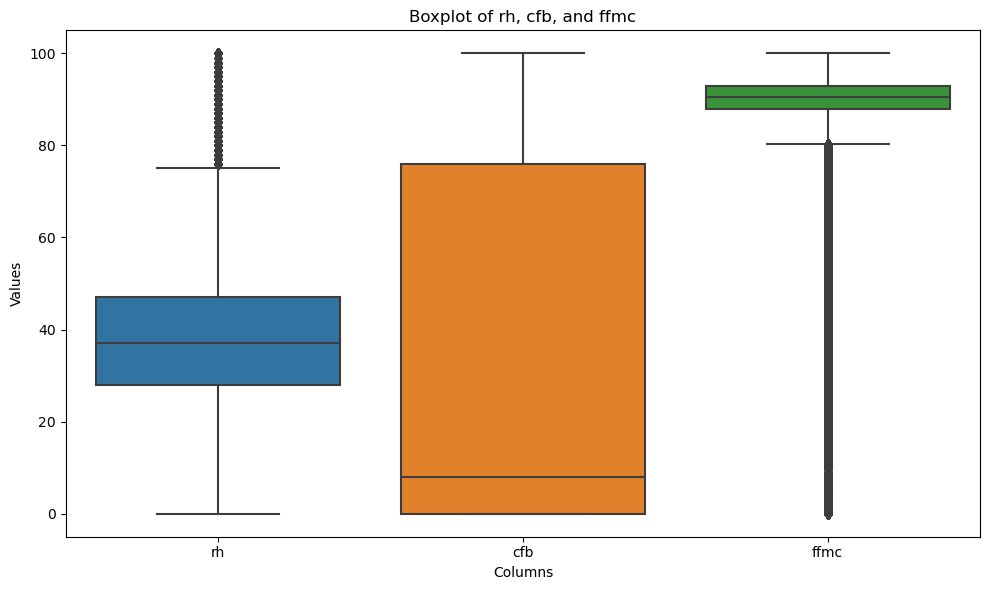

In [30]:
# Select only the columns you want for the boxplot: 'rh','cfb','ffmc'
columns_to_plot = ['rh','cfb','ffmc']
data_to_plot = data_filtered[columns_to_plot]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

# Add labels and title
plt.title('Boxplot of rh, cfb, and ffmc')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

__- Relative Humidity:__ there are some outliers between 60 to 100%. Its value is expressed as a percentage, typically ranging from 0% to 100%. Thus, the outliers are in the correct valide range.

__- Crown Fraction Burned:__ does not have any outliers.

__-The Fine Fuel Moisture Code:__ The FFMC valid ranges can go from 0 to 101, with higher values indicating drier and more flammable conditions. There are several outliers from 0 to 80. Nevertheless, they are in a valid range.

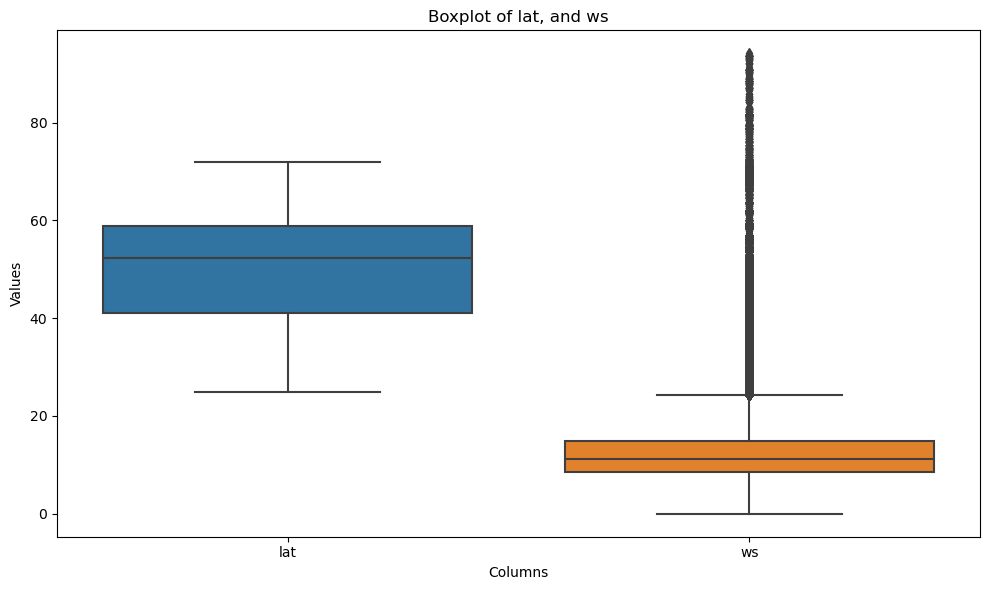

In [31]:
# Select only the columns you want for the boxplot: 'rh','cfb','ffmc'
columns_to_plot = ['lat','ws']
data_to_plot = data_filtered[columns_to_plot]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

# Add labels and title
plt.title('Boxplot of lat, and ws')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

__- Lattitude:__ there are not outliers in the graph. The latitude coordinates of BC (British Columbia,) should be between 48 and 70 degrees. 

__- Wind Speed:__ there are some outliers from 20 to 60. In some weather conditions, the maximum wind speeds are between 72-108 km/h. The outliers are in the valid range. It can go from 0 (calm) to 118 (hurricane) km/h approximately. But since there are no hurricanes in B.C. it should not reach 118.

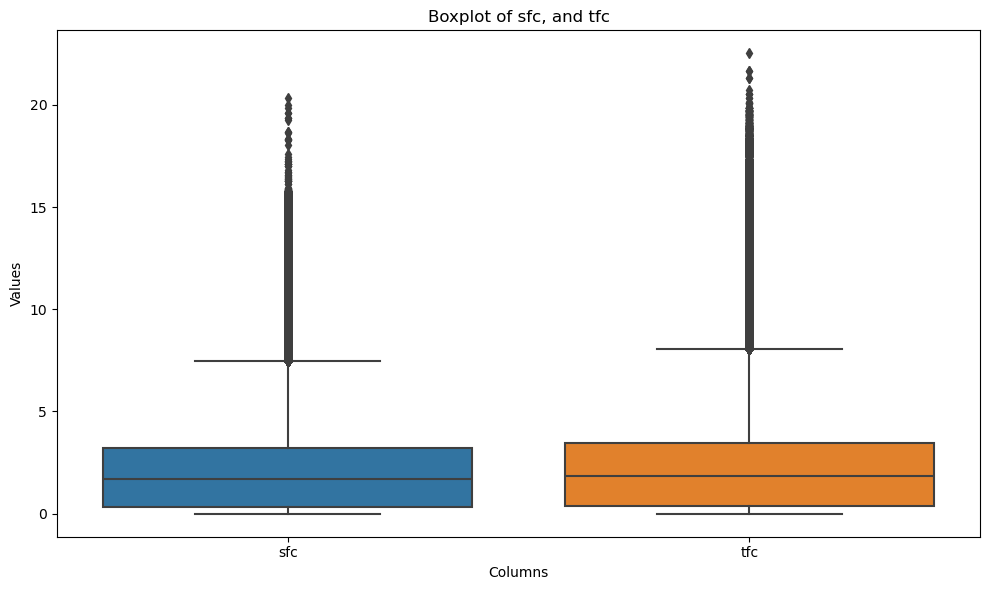

In [32]:
columns_to_plot = ['sfc','tfc']
data_to_plot = data_filtered[columns_to_plot]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

# Add labels and title
plt.title('Boxplot of sfc, and tfc')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

__-Surface Fuel Consumption:__ It can go from 0 (the vegetation remains unaffected) to more than 8 Kg/m² (extreme fire conditions, leaving the land without vegetation). We see some outliers between 8 and 20, since the data is about fires, it is within the valid range.

__-Total Fuel Consumption:__ It can go from to more than 15 Kg/m². 

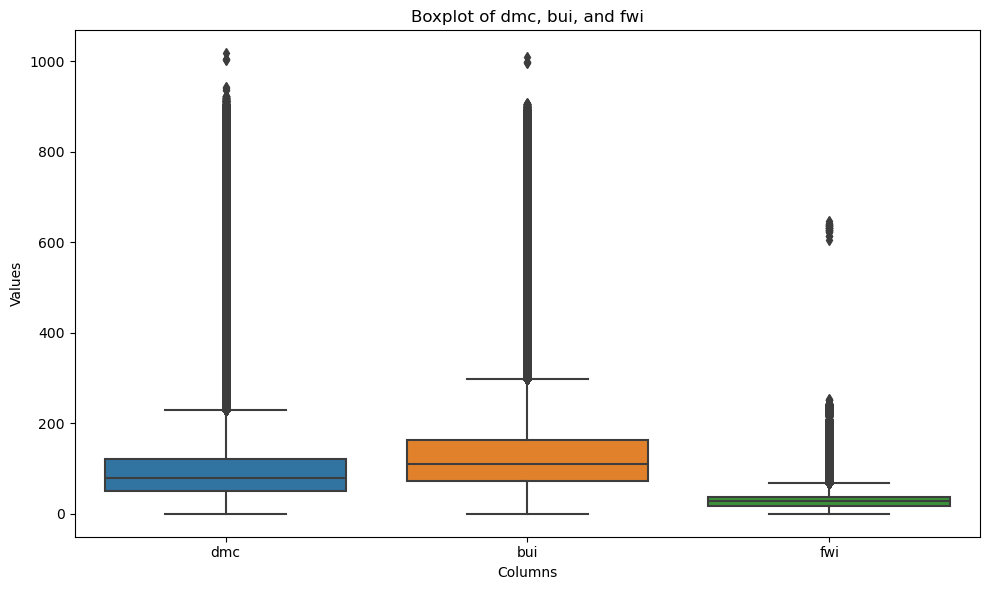

In [33]:
columns_to_plot = ['dmc','bui','fwi']
data_to_plot = data_filtered[columns_to_plot]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

# Add labels and title
plt.title('Boxplot of dmc, bui, and fwi')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

__-Duff Moisture Code:__ The DMC ranges can go from 0 to 1000. In the graph, we identify some outliers from 200 to 1000. These outliers indicate that the fire became more extreme and difficult to control.

__-Buildup Index:__ The BUI ranges from can go from 0 to infinity. The outliers are between 300 to 1000. These outliers indicate a large amount fuel, which can cause more intense fires.

__-Fire Weather Index:__ the values of FWI typically range between 0 and 500, though it can exceeed 500 in certain conditions, especially in regions with dry, windy, and hot weather (in this case, for fires). We can visualize outliers from 100 to 700 approximately, these outliers suggest there were critical conditions where fires started easily, spread rapidly, and had an intense behavior.

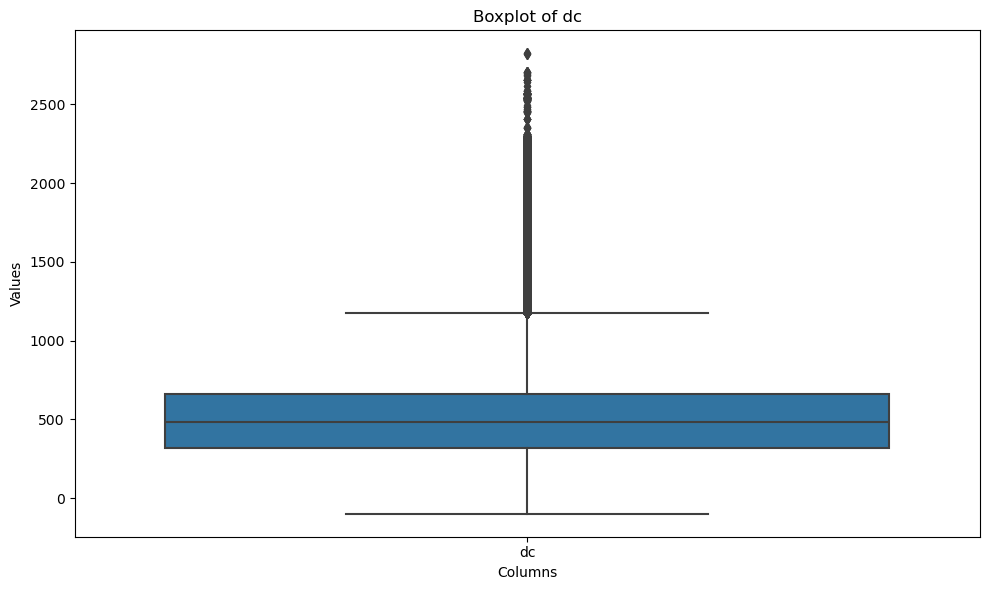

In [34]:
columns_to_plot = ['dc']
data_to_plot = data_filtered[columns_to_plot]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

# Add labels and title
plt.title('Boxplot of dc')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

__-Drought Code:__ The maximum drought code value of 2700 indicates extremely dry soil conditions, where moisture content is minimal. This can cause a rapid fire to spread, leading to high fire danger. The valid range for Drought Code (DC) is 0 to 1000, for values that exceed the maximum, it may be necessary to leave them at 1000, since a range greater than 1000 is not possible.


In [35]:
# For values that exceed 1000 in dc, replace them 1000
combined_data['dc'] = combined_data['dc'].apply(lambda x: 1000 if x > 1000 else x)
print(combined_data['dc'].describe())

count    1.107391e+07
mean     5.023029e+02
std      2.537826e+02
min     -9.900000e+01
25%      3.196010e+02
50%      4.844470e+02
75%      6.619460e+02
max      1.000000e+03
Name: dc, dtype: float64


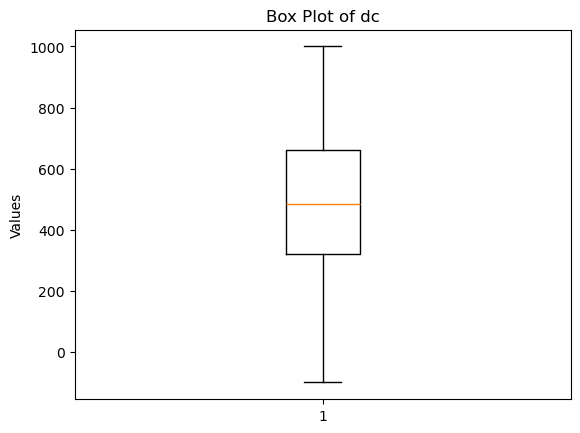

In [36]:
plt.boxplot(combined_data['dc'])
plt.title('Box Plot of dc')
plt.ylabel('Values')
plt.show()

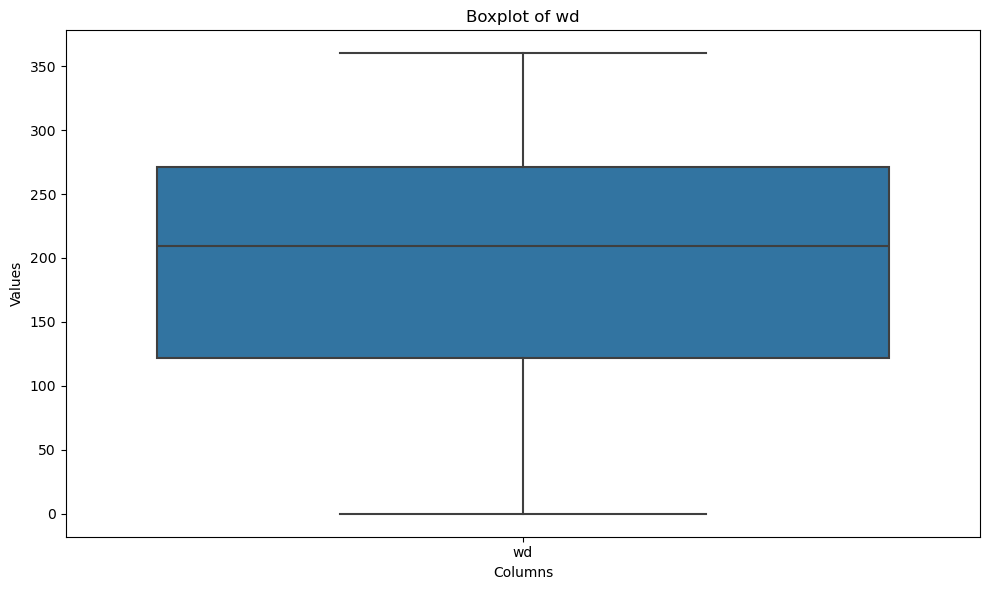

In [37]:
columns_to_plot = ['wd']
data_to_plot = data_filtered[columns_to_plot]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

# Add labels and title
plt.title('Boxplot of wd')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

__-Wind direction:__ The wind direction can go form 0 degrees to 360 degrees. There are no outliers in the graph.

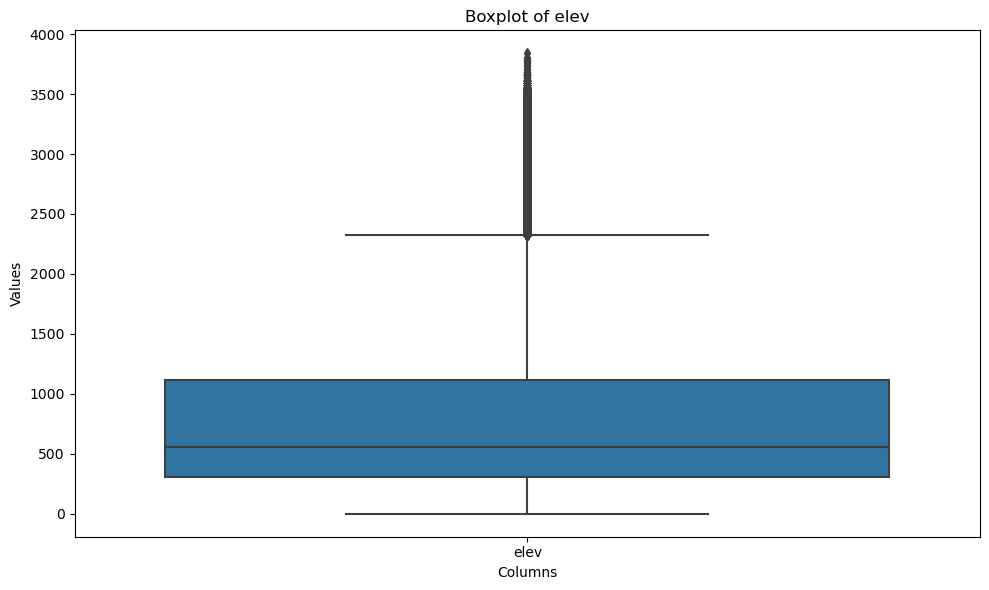

In [38]:
columns_to_plot = ['elev']
data_to_plot = data_filtered[columns_to_plot]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

# Add labels and title
plt.title('Boxplot of elev')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

__-Elevation:__ The elevation in B.C. can go from the sea level 0 meters to over 4,000 meters (13,000 feet), because of the mountains. So the outliers are within the valid range

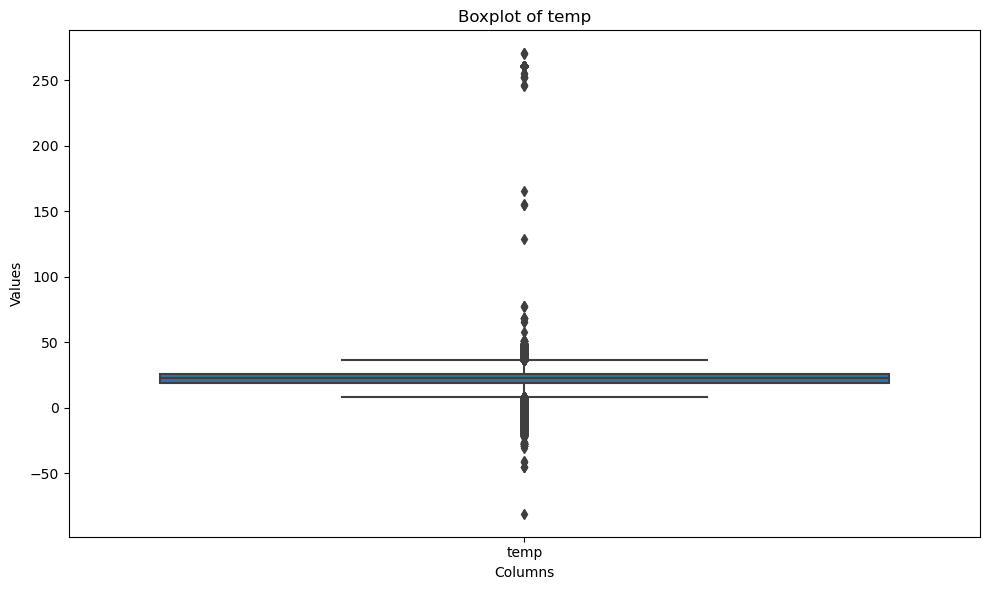

In [39]:
columns_to_plot = ['temp']
data_to_plot = data_filtered[columns_to_plot]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

plt.title('Boxplot of temp')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

__-Temperature:__ we can see some temperatures go below zero, which is an accurate temperature, because the lowest that B.C. has reached is –48.4°. However we see some values reaching 250. For a fire weather index that tracks ambient temperature, a temperature of 200°C would likely be an extreme and unrealistic value, as it would imply extremely hot conditions not typical for the environment around a wildfire. Thus for this column, the values that exceed the 200°C will be replace with the maximum value of 200°C and the same for the minimum

In [40]:
# For values that exceed 200 in temp, replace them 200
combined_data['temp'] = combined_data['temp'].apply(lambda x: 200 if x > 200 else x)

# For values that are below 49 in temp, replace them with 49
combined_data['temp'] = combined_data['temp'].apply(lambda x: -49 if x < -49 else x)

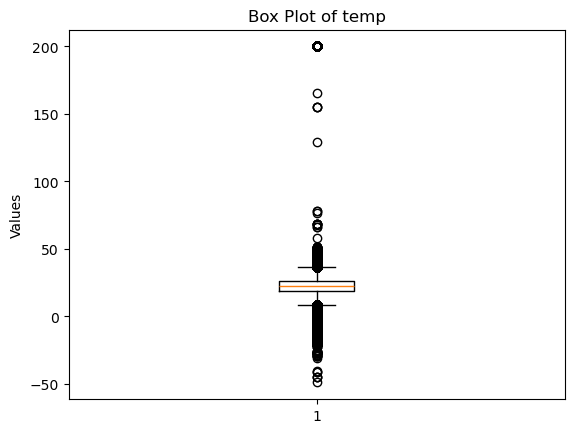

In [41]:
plt.boxplot(combined_data['temp'])
plt.title('Box Plot of temp')
plt.ylabel('Values')
plt.show()

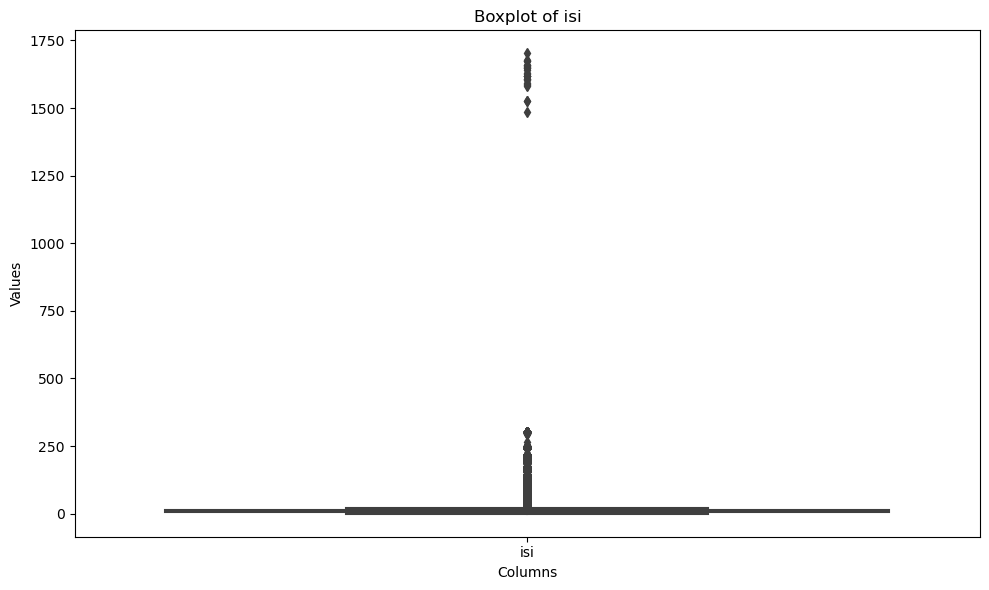

In [42]:
columns_to_plot = ['isi']
data_to_plot = data_filtered[columns_to_plot]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

plt.title('Boxplot of isi')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

__-Initial Spread Index:__ The ISI is used to quantify the expected rate of fire spread. It depends on factors such as the Fine Fuel Moisture Code (FFMC), wind speed (WS), temperature, etc. Since we already checked the valid range for all those variables, the ISI should be correct. The ISI ranges can go from 0 (there is no spread) to infinity (high spread).

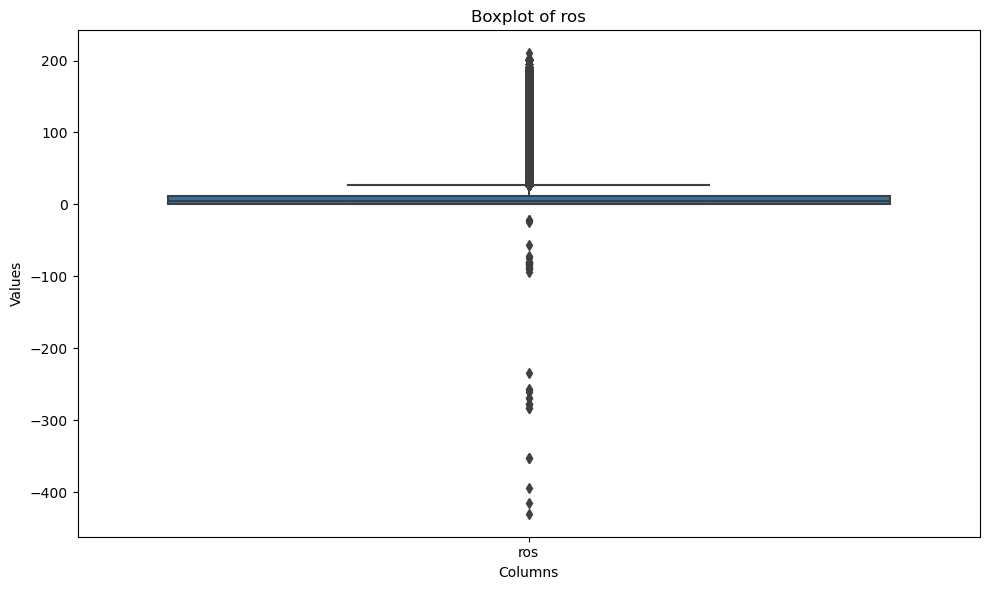

In [43]:
columns_to_plot = ['ros']
data_to_plot = data_filtered[columns_to_plot]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

plt.title('Boxplot of ros')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [44]:
# For values that are below 0 in ros, replace with 0
combined_data['ros'] = combined_data['ros'].apply(lambda x: 0 if x < 0 else x)

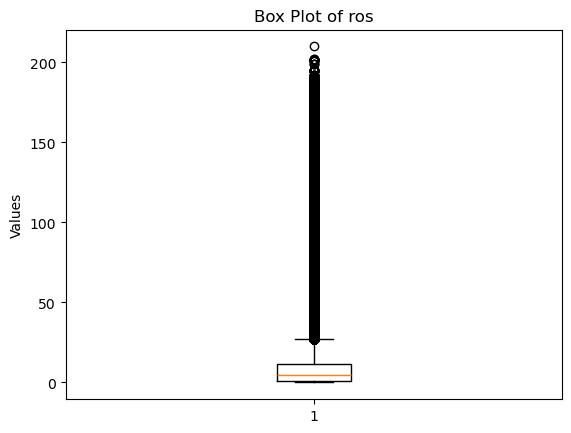

In [45]:
plt.boxplot(combined_data['ros'])
plt.title('Box Plot of ros')
plt.ylabel('Values')
plt.show()

__-Rate of spread:__ we see some negative outliers in the graph. A rate of spread cannot be negative in the context of fire behavior, because it refers to the speed at which a wildfire or fire front advances across the landscape. These outliers will be replaced with 0, since that is the minimum rate of spread. Based that we have these values in meters per minute, the range can go from 0 to more than 500 m/min. There cannot be negative in its values. Thus for the negactive values we will replace them with 0.

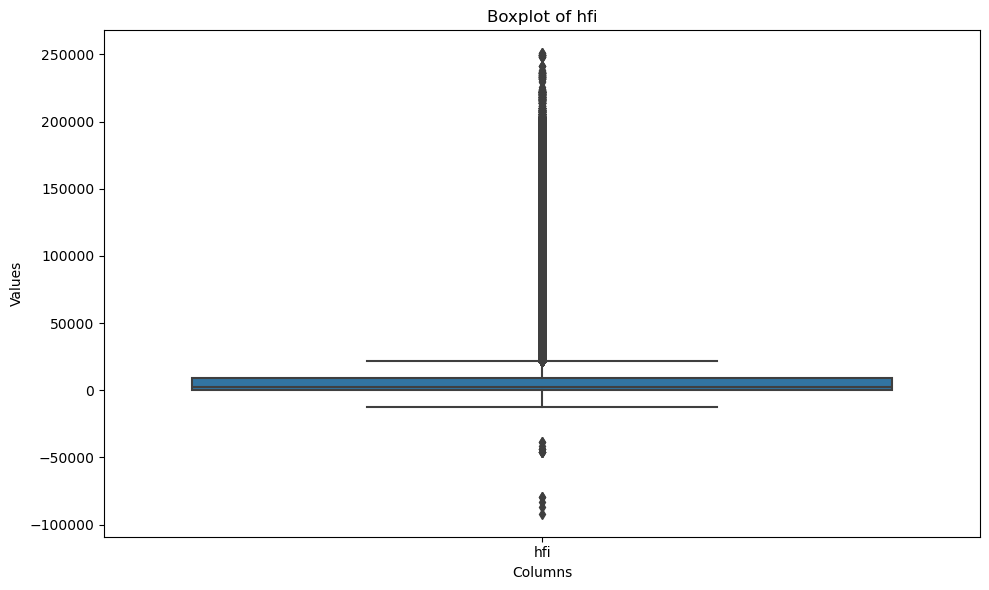

In [46]:
columns_to_plot = ['hfi']
data_to_plot = data_filtered[columns_to_plot]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

plt.title('Boxplot of hfi')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

__-Head Fire Intensity:__ Typically, it can go from 0 to to 10,000 kW/m or more, depending on the fire behavior and fuel conditions. There cannot be negative values.

In [47]:
# For values that are below 0 in hfi, replace with 0
combined_data['hfi'] = combined_data['hfi'].apply(lambda x: 0 if x < 0 else x)

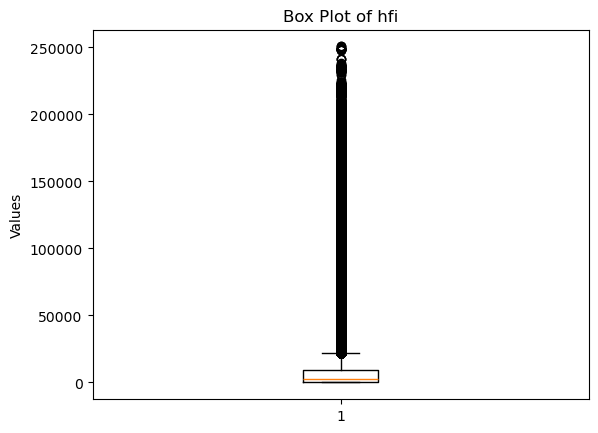

In [48]:
plt.boxplot(combined_data['hfi'])
plt.title('Box Plot of hfi')
plt.ylabel('Values')
plt.show()

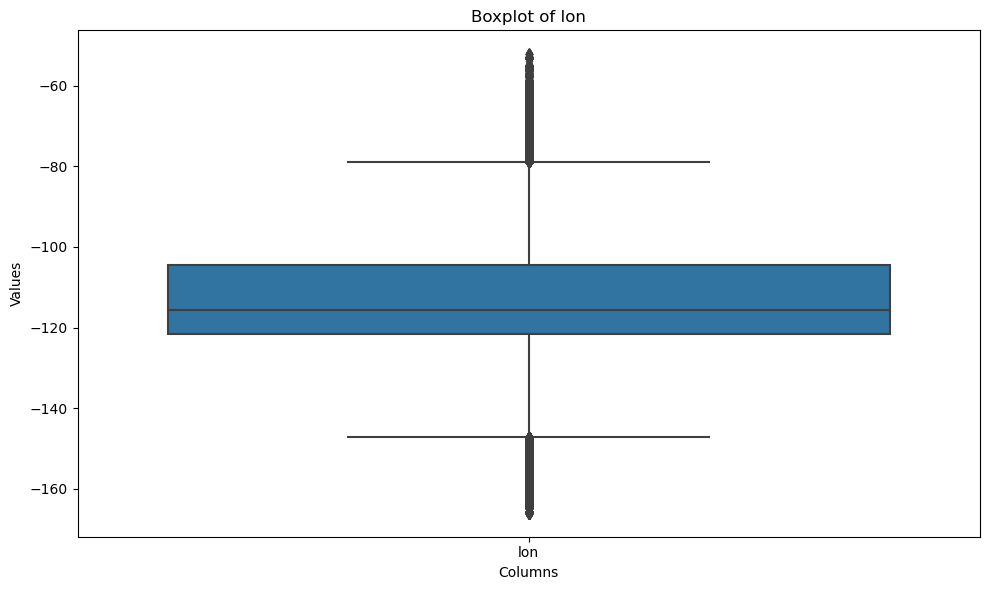

In [49]:
columns_to_plot = ['lon']
data_to_plot = data_filtered[columns_to_plot]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

plt.title('Boxplot of lon')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

__-Longitude:__ we can visualize some outliers from –160 to –140.  These values are valid, as they likely correspond to locations on the edges of BC. It’s possible that the fire originated in British Columbia and then spread into these atypical areas, leading to the observed longitude values.

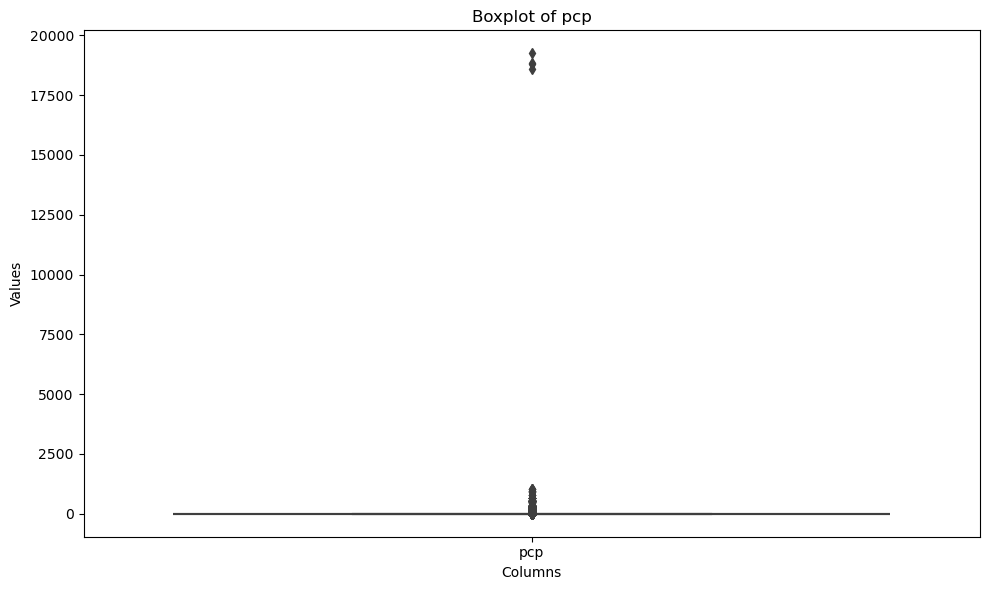

In [50]:
columns_to_plot = ['pcp']
data_to_plot = data_filtered[columns_to_plot]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)

plt.title('Boxplot of pcp')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

__-Precipitation:__ BC's precipitation changes depending on the season. It is during the winter and lower in the summer. Annual precipitation totals can range from less than 300 mm in some interior valleys.

In BC, it is possible for precipitation to exceed 1,000 mm in certain areas, particularly in regions with heavy rainfall due to topography and climatic conditions. While BC is known for its wet climate, especially along the coast. The record for the greatest rainfall in 24 hours in BC is 489.2 millimeters in Ucluelet Brynnor Mine

However, 20,000 mm (or 20 meters) in a single day is not realistic, even for the wettest areas on Earth. While British Columbia (BC) is known for its heavy rainfall, especially in coastal regions, daily rainfall totals of this magnitude are highly unlikely.This number is highly inlikely. Therefore it must be changed. For this case, considering the previous information, the maximum value for this column will be 1,000

In [51]:
# For values that are above 1000 in pcp, replace with 1000
combined_data['pcp'] = combined_data['pcp'].apply(lambda x: 1000 if x > 1000 else x)

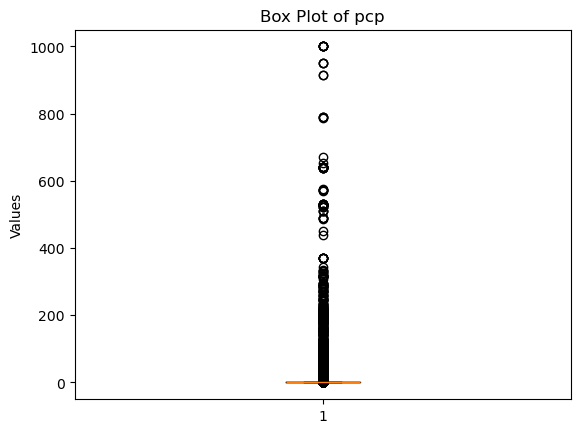

In [52]:
plt.boxplot(combined_data['pcp'])
plt.title('Box Plot of pcp')
plt.ylabel('Values')
plt.show()

# Export clean file to a CSV File

In [53]:
combined_data.to_csv('clean_data.csv', index=False)